In [3]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

# 이미지 처리 module들이 상당히 많이 존재해요!
# 가장 대표적인 module => opencv
# 쉽게사용할 수 있는 module 중 하나가 => Pillow 

<class 'PIL.JpegImagePlugin.JpegImageFile'>


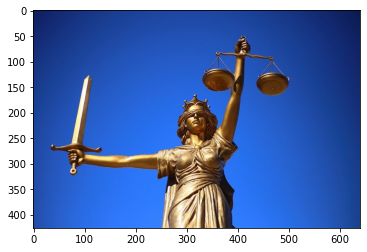

In [5]:
img = Image.open('./images/justice.jpg')

# 해당 이미지 파일에 대한 이미지 객체를 들고와요!
print(type(img))  # <class 'PIL.JpegImagePlugin.JpegImageFile'>

plt.imshow(img)
plt.show()

In [8]:
pixel = np.array(img)    # pillow 이미지 객체를 이용해서 ndarray 생성
# print(pixel)
print(pixel.shape)   # (426, 640, 3)
                     #  세로, 가로, 색상(channel)
                     # .png 파일이 있어요!  channel이 4 (R,G,B, alpha)값으로 구성
                     # alpha는 투명도.  
            
print(pixel[100,100])  # [ 30  71 161]   
                       #  RED  GREEN  BLUE
        

(426, 640, 3)
[ 30  71 161]


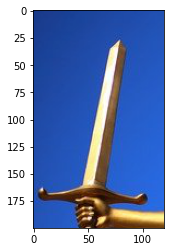

In [10]:
# Pillow를 이용한 이미지 처리

# cropping(이미지 잘라내기)
# crop(좌상, 우하)
crop_img = img.crop((30,100,150,300))
plt.imshow(crop_img)
plt.show()

(640, 426)


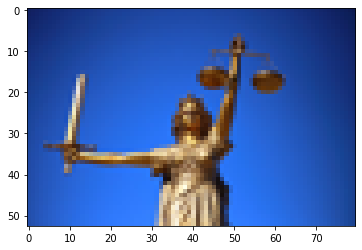

In [13]:
# Pillow를 이용한 이미지 처리

# Image Resize
print(img.size)   # (640, 426)   가로 픽셀수와 세로 픽셀수를 알려줘요!

resize_img = img.resize((int(img.size[0] / 8), int(img.size[1] / 8)))
plt.imshow(resize_img)
plt.show()

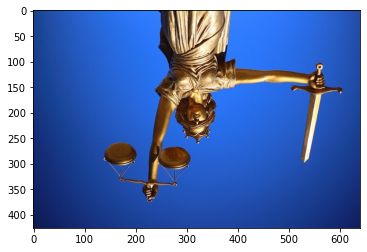

In [15]:
# Pillow를 이용한 이미지 처리

# Image Rotate
rotate_img = img.rotate(180)

plt.imshow(rotate_img)
plt.show()

rotate_img.save('./images/rotate_justice.jpg')

In [10]:
import numpy as np
import tensorflow as tf

# 입력이미지의 형태
# (이미지 개수, height, width, channel)
# (1, 3, 3, 1)
image = np.array([[[[9], [8], [7]],
                   [[6], [5], [4]],
                   [[3], [2], [1]]]], dtype=np.float64)

print(image.shape)

# filter의 형태
# filter의 channel수는 이미지의 channel수와 같아요!
# (filter height, filter width, filter channel, filter 개수)
# (2,2,1,1)
weight = np.array([[[[2]],
                   [[2]]],
                   [[[2]],
                    [[2]]]])
print(weight.shape)

# stride : 1
# padding : 'VALID'(no padding) or 
#           'SAME'(convolution결과가 원본 이미지의 크기와 같아요!)

con2d = tf.nn.conv2d(image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')

# 결과 : (이미지 개수, 이미지 height, 이미지 width, channel)

sess = tf.Session()

result = sess.run(con2d)
print(result)

(1, 3, 3, 1)
(2, 2, 1, 1)

[[[[56.]
   [48.]]

  [[32.]
   [24.]]]]
